In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('dfinal2.csv', delimiter = ';')

df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.000000,51.000000,8.0,322.0,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.190574,25.538934,8.3,138.0,E
2,2,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,68.190574,25.538934,8.3,138.0,E
3,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.000000,73.000000,8.3,709.0,E
4,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.000000,73.000000,8.0,192.0,E


# Data Verification Steps

In [2]:
#Checking the Shape of the Data
df.shape

(16730, 16)

In [3]:
# Checking for Duplicate Rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [4]:
#Checking Column Types and Memory Usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16730 non-null  int64  
 1   Name          16730 non-null  object 
 2   Platform      16730 non-null  object 
 3   Year          16730 non-null  float64
 4   Genre         16730 non-null  object 
 5   Publisher     16715 non-null  object 
 6   NA_Sales      16730 non-null  float64
 7   EU_Sales      16730 non-null  float64
 8   JP_Sales      16730 non-null  float64
 9   Other_Sales   16730 non-null  float64
 10  Global_Sales  16730 non-null  float64
 11  Critic_Score  16730 non-null  float64
 12  Critic_Count  16730 non-null  float64
 13  User_Score    16730 non-null  float64
 14  User_Count    16730 non-null  float64
 15  Rating        10688 non-null  object 
dtypes: float64(10), int64(1), object(5)
memory usage: 2.0+ MB


In [5]:
#Checking for Missing Values (NaNs)
df.isna().sum()

,0
Unnamed: 0,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,15
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [6]:
# Checking Data Types of Columns
df.dtypes

,0
Unnamed: 0,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [7]:
#Checking Unique Values in the 'Publisher' Column
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Sony Computer Entertainment Europe', 'Bethesda Softworks',
       'Electronic Arts', 'Sega', 'SquareSoft', 'Namco Bandai Games',
       'Atari', '505 Games', 'Square Enix', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'LucasArts', 'Virgin Interactive',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'Eidos Interactive', 'RedOctane', 'Aspyr', 'Vivendi Games',
       'EA Tiburon', 'Enix Corporation', 'Success', 'Namco', 'Palcom',
       'Unknown', 'Parker Bros.', 'Hasbro Interactive', 'Valve Software',
       'THQ', 'Fox Interactive', 'Acclaim Entertainment', 'MTV Games',
       'Disney Interactive Studios', 'EA Sports', 'Coleco',
       'Majesco Entertainment', 'Codemasters', 'Arena Entertainment',
       'Red Orb', 'Psygnosis', 'Midway Games', 'Sunsoft', 'Level 5',
       'Rebellion', 'Taito', 

#  Data Cleaning and Preparation

In [8]:
# Dropping Unnecessary Columns
df.drop([ "Rating","Unnamed: 0","NA_Sales","EU_Sales", "JP_Sales","Other_Sales" ], axis=1, inplace=True)

In [11]:
#Update the Dataset
df.tail()

,Name,Platform,Year,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
16725,Transport Fever,"('PC',)",2016.0,Simulation,Astragon,0.04,70.0,11.0,7.0,28.0
16726,Until Dawn: Rush of Blood,"('PS4',)",2016.0,Adventure,Sony Computer Entertainment,0.39,72.0,49.0,8.0,68.0
16727,Watch Dogs 2,"('PS4',)",2016.0,Action,Ubisoft,1.13,83.0,88.0,7.8,621.0
16728,World of Final Fantasy,"('PS4',)",2016.0,Role-Playing,Square Enix,0.33,77.0,74.0,8.3,222.0
16729,WWE 2K17,"('PS4',)",2016.0,Sports,Take-Two Interactive,0.60,69.0,50.0,6.9,88.0


In [12]:
# Splitting the Data: Hold-out Method
from sklearn.model_selection import train_test_split

target = df.drop('Global_Sales', axis = 1)
features = df['Global_Sales']

X_train,X_test, y_train,y_test = train_test_split(target,features, test_size = 0.3 , random_state = 42)

print("Train shape :",X_train.shape)
print("Test Shape :",X_test.shape)

Train shape : (11711, 9)
Test Shape : (5019, 9)


In [13]:
# Fill missing values with the mode
categorical_columns = ['Publisher']

for col in categorical_columns:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_train[col].mode()[0])

In [14]:
# Update NAN
X_train.isna().sum()

,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
Critic_Score,0
Critic_Count,0
User_Score,0
User_Count,0


# Data Visualization

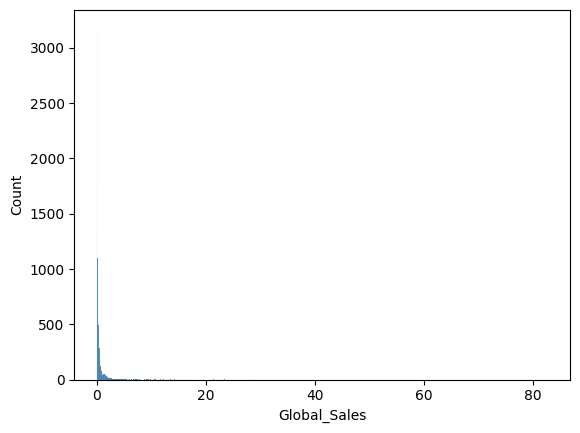

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Displaying the distribution of the 'Global_Sales' variable
sns.histplot(df['Global_Sales'])
plt.show()

<ipython-input-16-228ab666ad57>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  data_viz.set_xticklabels(data_viz.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Year'),
 Text(1, 0, 'Global_Sales'),
 Text(2, 0, 'Critic_Score'),
 Text(3, 0, 'Critic_Count'),
 Text(4, 0, 'User_Score'),
 Text(5, 0, 'User_Count')]

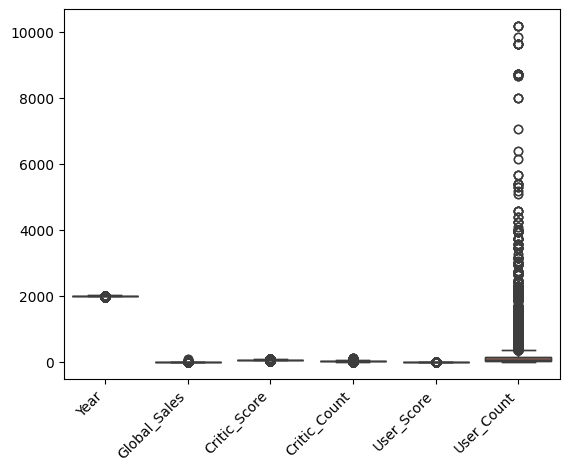

In [16]:
# Display Boxplot to identify outliers and extreme values
sns.boxplot(data =df);
data_viz = sns.boxplot(data = df)
data_viz.set_xticklabels(data_viz.get_xticklabels(), rotation=45, horizontalalignment='right')

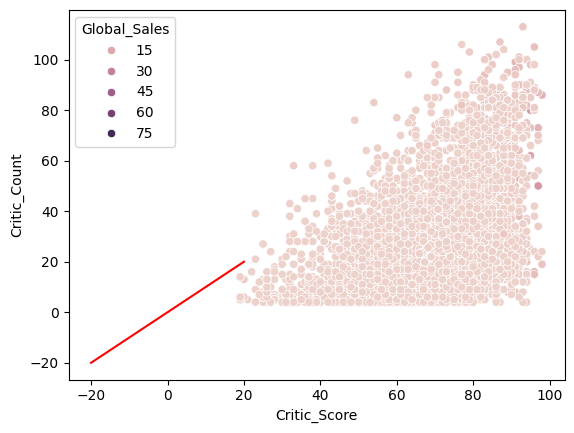

In [17]:
# Shows the relationship between target variable and other variable

sns.scatterplot( x= 'Critic_Score', y= 'Critic_Count' , hue = 'Global_Sales' , data = df)
plt.plot([-20, 20], [-20, 20], color = 'red');

Scatter Plot of 'Critic_Score' vs. 'Critic_Count' Colored by 'Global_Sales'

The scatter plot illustrates the relationship between Critic_Score and Critic_Count, with the color of the points indicating the corresponding Global_Sales.

Observation: There appears to be a general upward trend, suggesting that as Critic_Score increases, Critic_Count also tends to rise, although this relationship is not strictly linear.

Reference Line: A red line is included to indicate a basic linear regression reference. However, this line appears misaligned as it starts outside the range of the data. This may be attributed to the line being used to depict an overall directional trend rather than accurately representing the specific distribution of the data.

Relationship Between Variables

The Critic_Score and Critic_Count demonstrate a positive relationship, though it is non-linear. This indicates that while higher critic scores may correlate with increased critic counts, the nature of this relationship is more complex and may be influenced by other factors.

### Encoding

In [18]:
# Encoding categorical variables with Hashing Encoder

# Install the category_encoders library if needed
!pip install category_encoders
!pip install --upgrade pip
import category_encoders as ce

# Create a HashingEncoder object for specified columns with 4 hash components
encoder = ce.HashingEncoder(cols=['Name', 'Platform', 'Genre', 'Publisher'], n_components=4)

# Applying 'fit_transform' for hashing encoding on the training set
X_train_hash = encoder.fit_transform(X_train)

# Apply the same transformation to the test set
X_test_hash = encoder.transform(X_test)

# Convert encoded data back to DataFrames, with hash-based column names
X_train_encoded = pd.DataFrame(X_train_hash, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_hash, index=X_test.index)

# Check the shape of the transformed data
print("Training set shape:", X_train_encoded.shape)
print("Test set shape:", X_test_encoded.shape)

# Display the first few rows of the transformed datasets
print(X_train_encoded.head())
print(X_test_encoded.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Training set shape: (11711, 9)
Test set shape: (5019, 9)
       col_0  col_1  col_2  col_3    Year  Critic_Score  Critic_Count  \
15816      0      1      1      2  2016.0     72.992157     35.711111   
1458       0      3      1      0  1998.0     81.000000     17.000000   
11942      0      1      1      2  2004.0     70.758799     40.787785   
10810      0      3      1      0  2004.0     48.000000     20.000000   
10843      0      2      1      1  2000.0     73.283019     25.043019   

       User_Score  User_Count  
15816    7.653837  385.848414  
1458     8.900000   89.000000  
11942    7.166465  386.557884  
10810    6.700000   13.000000  
10843    7.132806   71.453333  
       col_0  

In [19]:
# Checking the encoded data shape
print("Encoded training set shape:", X_train_encoded.shape)
print("Encoded test set shape:", X_test_encoded.shape)

Encoded training set shape: (11711, 9)
Encoded test set shape: (5019, 9)


### Features Engineering

In [20]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Standardizing the encoded features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Selecting the top features for linear regression
k = 4  # Adjust the number of features to select
selector = SelectKBest(f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Displaying the number of features before and after selection
print("Original number of features:", X_train_encoded.shape[1])
print("Reduced number of features:", X_train_selected.shape[1])

# Applying the same feature selection to the test set
X_test_selected = selector.transform(X_test_scaled)

# Displaying the selected feature columns
selected_columns = X_train_encoded.columns[selector.get_support()]
print("Selected features:", selected_columns)

Original number of features: 9
Reduced number of features: 4
Selected features: Index(['Year', 'Critic_Score', 'Critic_Count', 'User_Count'], dtype='object')


### Feature Scaling and Selection
1. **Standardization**: We standardize the encoded features using `StandardScaler` for uniform feature scaling.
2. **Feature Selection**: We use `SelectKBest` with the `f_regression` scoring function to select the top 4 features most correlated with the target, improving model performance and interpretability.

This combination of scaling and feature selection helps streamline our dataset for linear regression modeling.

# Linear Regression

In [21]:
# Testing the First Model: Linear Regression

from sklearn.linear_model import LinearRegression

# Instantiate the model
model1 = LinearRegression()

# Fit the model to the training data
model1.fit(X_train_selected, y_train)

# Calculate predictions on the test set
predictions = model1.predict(X_test_selected)

# Calculate prediction errors
errors = predictions - y_test
print("Prediction errors:", errors)

# Display the estimated intercept
print("Intercept (model bias):", model1.intercept_)

# Display the first estimated coefficient
print("First coefficient:", model1.coef_[0])

Prediction errors: 12773    0.289225
9152     0.207658
6698    -0.114379
16538    0.295363
3280    -0.482392
           ...   
10170    0.360666
1897    -1.114031
14981    0.150059
8537     0.133196
16591    0.093270
Name: Global_Sales, Length: 5019, dtype: float64
Intercept (model bias): 0.527203483904019
First coefficient: -0.18452317614634445


### Model 1: Linear Regression
In this section, we:
1. Instantiate and fit a **Linear Regression** model.
2. Calculate **predictions** and **prediction errors** on the test set.
3. Display the model's **intercept** (bias) and the first **coefficient**.

These metrics help us interpret the model's linear relationships and assess its accuracy.

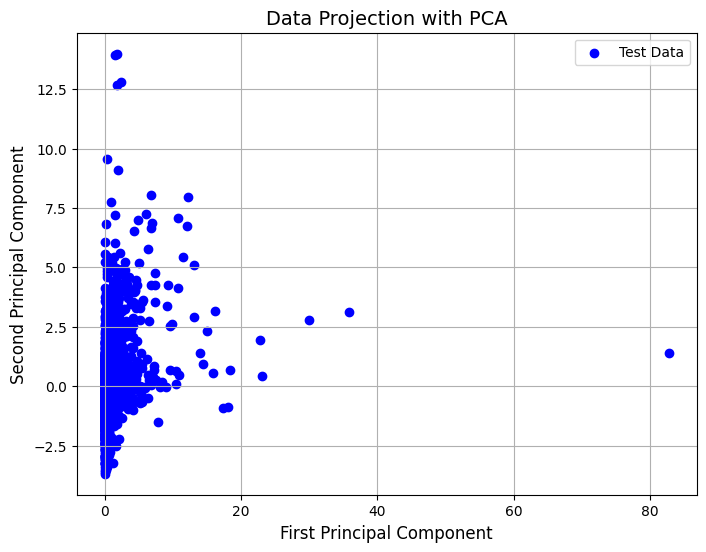

In [22]:
# Application of Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Reducing dimensionality to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

# Creating a new linear regression model
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Making predictions on the reduced test set
y_pred_pca = model_pca.predict(X_test_pca)

# Visualizing the data with PCA direction vectors and the regression line
plt.figure(figsize=(8, 6))
plt.grid()

# Plotting the projected points
plt.scatter(y_test, X_test_pca[:, 0], color='blue', label='Test Data')

# Adding labels, title, and legend
plt.title("Data Projection with PCA", fontsize=14)
plt.xlabel("First Principal Component", fontsize=12)
plt.ylabel("Second Principal Component", fontsize=12)
plt.legend()
plt.show()

**The PCA**: illustrates the projection of the test data onto the first two principal components obtained from the PCA. This visualization is instrumental in observing how the data points are distributed in a reduced-dimensional space. The concentration of points in the lower left quadrant suggests that the first two principal components effectively capture a significant portion of the overall variance in the dataset. However, the presence of outliers can complicate the interpretation of relationships between the variables, indicating that while the PCA has reduced dimensionality, the extreme values may still mask underlying patterns.

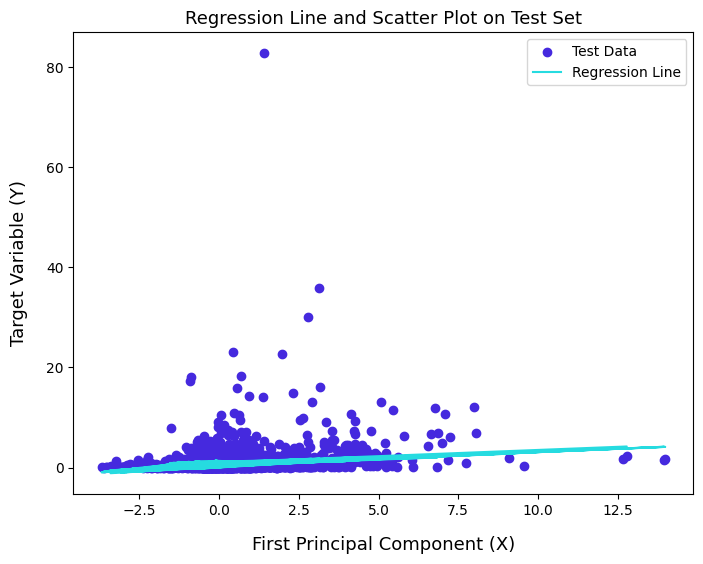

In [23]:
plt.figure(figsize=(8, 6))

# Scatter plot of test data projected onto the first principal component
plt.scatter(X_test_pca[:, 0], y_test, color='#4529de', label='Test Data')

# Plotting the regression line based on predictions
plt.plot(X_test_pca[:, 0], y_pred_pca, color='#26dbe0', label='Regression Line')

# Adding title and labels
plt.title("Regression Line and Scatter Plot on Test Set", fontsize=13)
plt.xlabel("First Principal Component (X)", labelpad=13, fontsize=13)
plt.ylabel("Target Variable (Y)", rotation=90, labelpad=13, fontsize=13)

# Displaying the plot
plt.legend()
plt.show()

**Visualization of Regression with PCA**
This graph depicts the projected test data along the first principal component, accompanied by a regression line. The cyan line represents the relationship between this principal component (X) and the target variable (Y). The relatively flat nature of the regression line indicates that the first principal component may not adequately capture the variability of the target variable, suggesting a weak relationship between them. This finding raises the possibility that other original variables or additional principal components may contain essential information for predicting the target, implying that relying solely on the first principal component could overlook significant complexities within the data.

#### Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluating the Model
mse_lr = mean_squared_error(y_test, predictions)
r2_lr = r2_score(y_test, predictions)
mae_lr = mean_absolute_error(y_test, predictions)

print(f"MSE (Linear Regression): {mse_lr}")
print(f"R^2 (Linear Regression): {r2_lr}")
print(f"MAE (Linear Regression): {mae_lr}")

MSE (Linear Regression): 3.163022573584194
R^2 (Linear Regression): 0.06673976433984463
MAE (Linear Regression): 0.5606069986406028


With an **R²** score of 0.067, the model explains only about 6.7% of the variance in the target variable, which is quite low. In practice, this implies that the model has limited predictive power and does not fully capture the relationships within the data.
**key Takeways** These metrics collectively indicate that our initial Linear Regression model has limited effectiveness in predicting the target variable.

### Model 2: Decision Tree Regressor

To improve the **model’s performance**, we might consider Trying alternative algorithms as **Decision Tree Regressor**


Let's diving into this model performance !

In [25]:
# Importing the DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor

# Instantiating the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Training the Decision Tree model using the selected features
dt_model.fit(X_train_selected, y_train)

# Making predictions on the test set using the trained model
y_pred_dt = dt_model.predict(X_test_selected)

# Calculating the Mean Squared Error (MSE), R-squared (R^2), and Mean Absolute Error (MAE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Displaying the evaluation metrics for the Decision Tree model
print(f"MSE (Decision Tree): {mse_dt}")
print(f"R^2 (Decision Tree): {r2_dt}")
print(f"MAE (Decision Tree): {mae_dt}")

MSE (Decision Tree): 3.698589888586083
R^2 (Decision Tree): -0.09128113718162689
MAE (Decision Tree): 0.5562760445685133


**The Decision Tree Regressor** did not improve predictive accuracy for this dataset, as indicated by the high MSE and low (negative) R² score. This model may be overfitting or unable to capture the necessary patterns in the data effectively.

### Grid Search

**Next Steps Hyperparameters** ...

In [26]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Grid Search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing Grid Search with DecisionTreeRegressor

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Displaying the best parameters and score from Grid Search
print("Best hyperparameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score (MSE): 1.7394245049724262


In [27]:
# Instantiating the Decision Tree with optimized parameters
model_min_samples = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, random_state=42)
model_min_samples.fit(X_train_selected, y_train)

# Scoring on training and test sets
print('Training set score:', model_min_samples.score(X_train_selected, y_train))
print('Test set score:', model_min_samples.score(X_test_selected, y_test))

Training set score: 0.3553806586177185
Test set score: 0.018334636330379128


After tuning the Decision Tree Regressor model with the best hyperparameters (max_depth=5, min_samples_leaf=4, min_samples_split=2), we obtained the following results:

**Best MSE from Tuning: 1.74**
This optimized MSE is a notable improvement over the initial Decision Tree model (MSE = 3.70), indicating that tuning has helped reduce prediction error.

While tuning the hyperparameters has reduced the prediction error and slightly improved the model’s fit on the training data, the low test set score indicates that the model is still limited in its ability to generalize

# Conclusion

While **the Decision Tree model** achieved a lower MSE after tuning, it still struggled to generalize to the test data, as seen in the low test R². **Linear Regression**, although less complex, also showed poor predictive power. Both models faced challenges with generalization, suggesting that further model experimentation or feature engineering is needed.